# VÍ DỤ 1

In [2]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
# Số điểm mỗi cụm dữ liệu
N = 500
# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)
# Số cụm = 3
K = 3
# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [4]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [5]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [6]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [7]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers])

In [8]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


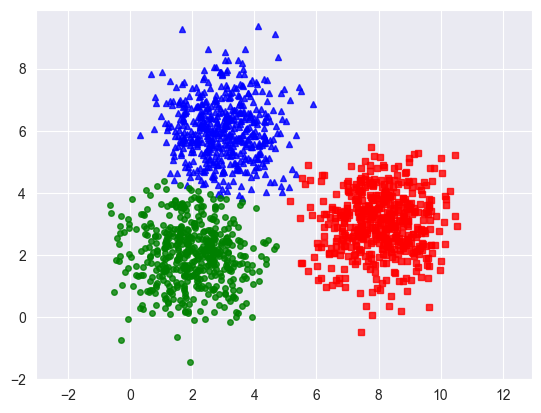

In [9]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

# VÍ DỤ 2

In [10]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = 'data_img'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [11]:
def get_mnist_data(images_path, labels_path, num_images , shuffle=False, _is=True, image_size=28):
    """
        This shuffle param is active when .gz is downloaded at:
        - 'http://yann.lecun.com/exdb/mnist/'
        - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [17]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)

# thực hiện phân cụm bằng phương pháp k-means, tiếp theo hãy kiểm tra xem trong mỗi cụm, tỷ lệ có nhãn nào (từ 0 đến 9) là cao nhất. Sau đó đếm và in ra tỷ lệ các mẫu không thuộc nhãn đó nhưng được phân vào cùng một cụm với nhãn.

from sklearn.cluster import KMeans # Thư viện hỗ trợ phân cụm
from collections import Counter # Thư viện hỗ trợ đếm

kmeans = KMeans(n_clusters=10, random_state=0).fit(train_images)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

# nếu clusters i có hệ số = 0 thì không tính
# nếu clusters i có hệ số > 0 thì tính tỷ lệ các mẫu không thuộc nhãn i nhưng được phân vào cùng một cụm với nhãn i

for i in range(10):
    if np.count_nonzero(labels == i) == 0:
        continue
    else:
        print('Cluster', i)
        print('Most frequent label:', Counter(train_labels[labels == i]).most_common(1)[0][0])
        print('Other labels:')
        print(Counter(train_labels[labels == i]).most_common()[:-1])
        print()


C:\Users\thanhsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0
Most frequent label: 3
Other labels:
[(3, 392), (5, 178), (8, 135), (2, 25), (0, 12), (9, 11), (1, 2)]

Cluster 1
Most frequent label: 4
Other labels:
[(4, 136), (6, 100), (9, 80), (0, 18), (2, 18), (7, 17), (8, 16), (5, 12)]

Cluster 2
Most frequent label: 1
Other labels:
[(1, 264), (2, 31), (8, 21), (7, 15), (4, 11), (5, 8), (9, 2), (6, 1)]

Cluster 3
Most frequent label: 6
Other labels:
[(6, 352), (0, 26), (5, 16), (4, 11), (2, 6), (3, 4), (8, 3), (9, 1)]

Cluster 4
Most frequent label: 8
Other labels:
[(8, 240), (5, 115), (3, 64), (0, 36), (2, 11), (6, 4), (9, 3)]

Cluster 5
Most frequent label: 0
Other labels:
[(0, 361), (5, 7), (3, 5), (6, 5), (2, 2), (8, 2)]

Cluster 6
Most frequent label: 7
Other labels:
[(7, 261), (9, 176), (4, 142), (5, 18), (8, 14), (2, 5), (3, 3), (0, 2)]

Cluster 7
Most frequent label: 1
Other labels:
[(1, 294), (5, 78), (3, 48), (2, 47), (9, 25), (7, 25), (8, 23), (6, 14), (4, 12)]

Cluster 8
Most frequent label: 9
Other labels:
[(9, 202), (7, 1